## Box Cox Function

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import pandas as pd
from scipy.stats import pareto, boxcox, probplot, kstest


In [28]:
from sklearn.datasets import load_iris

In [30]:
data = load_iris()
iris_df = pd.DataFrame(data.data, columns=data.feature_names)
iris_df['species'] = data.target
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [52]:
shape, loc, scale = pareto.fit(iris_df['sepal width (cm)'], floc=0)
print("Estimated alpha:", shape)

Estimated alpha: 2.413756561020532


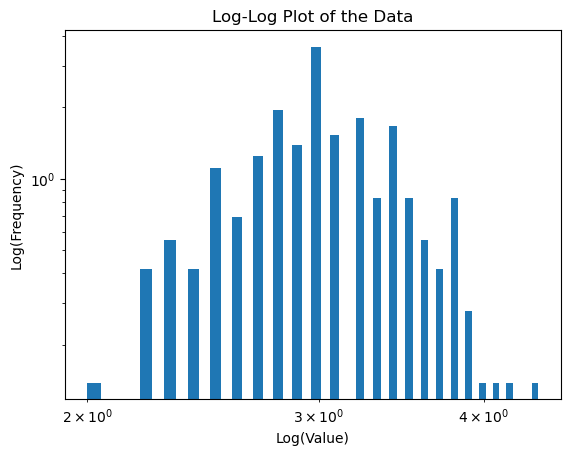

In [54]:
plt.hist(iris_df['sepal width (cm)'], bins=50, density=True, log=True)
plt.yscale('log')
plt.xscale('log')
plt.title("Log-Log Plot of the Data")
plt.xlabel("Log(Value)")
plt.ylabel("Log(Frequency)")
plt.show()

Alpha parameter: 2.413756561020532


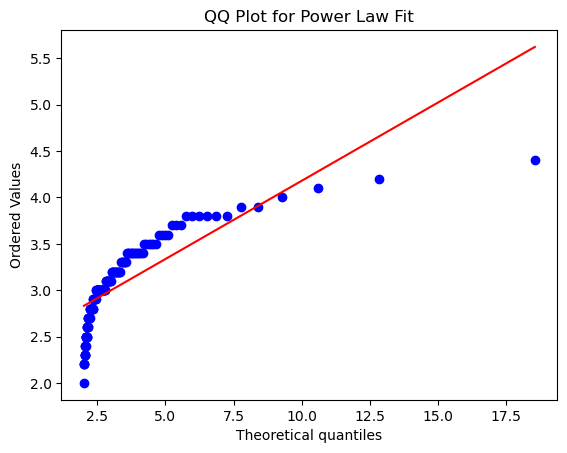

In [40]:
alpha, loc, scale = pareto.fit(iris_df['sepal width (cm)'], floc=0)
print("Alpha parameter:", alpha)
probplot(iris_df['sepal width (cm)'], dist="pareto", sparams=(alpha, loc, scale), plot=plt)
plt.title("QQ Plot for Power Law Fit")
plt.show()

Best lambda for Box-Cox: 0.281011357322276


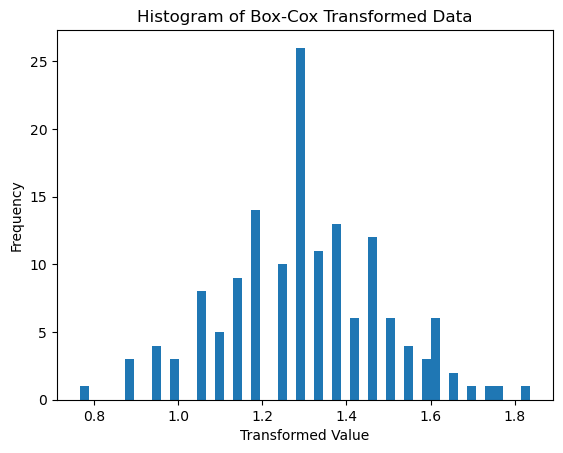

In [62]:
transformed_data, best_lambda = boxcox(iris_df['sepal width (cm)'])
print("Best lambda for Box-Cox:", best_lambda)
plt.hist(transformed_data, bins=50)
plt.title("Histogram of Box-Cox Transformed Data")
plt.xlabel("Transformed Value")
plt.ylabel("Frequency")
plt.show()


In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(power_law_data, bins=30, kde=True, color='blue')
plt.title('Power Law Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()  # Display the first plot

## Plot 2: Log-Transformed Data
plt.figure(figsize=(8, 6))
sns.histplot(log_transformed_data, bins=30, kde=True, color='green')
plt.title('Log-Transformed Data (Approx. Normal)')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')
plt.show()  # Display the second plot

## Plot 3: Fitted Normal Distribution
plt.figure(figsize=(15, 6))
## Create histogram for the normal samples
sns.histplot(normal_samples, bins=30, kde=True, color='orange', stat='density')
## Overlay the theoretical normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)  # Calculate the PDF for the normal distribution
plt.plot(x, p, 'k', linewidth=2)  # Plot the PDF
plt.title('Fitted Normal Distribution from Log-Transformed Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()  # Display the third plot


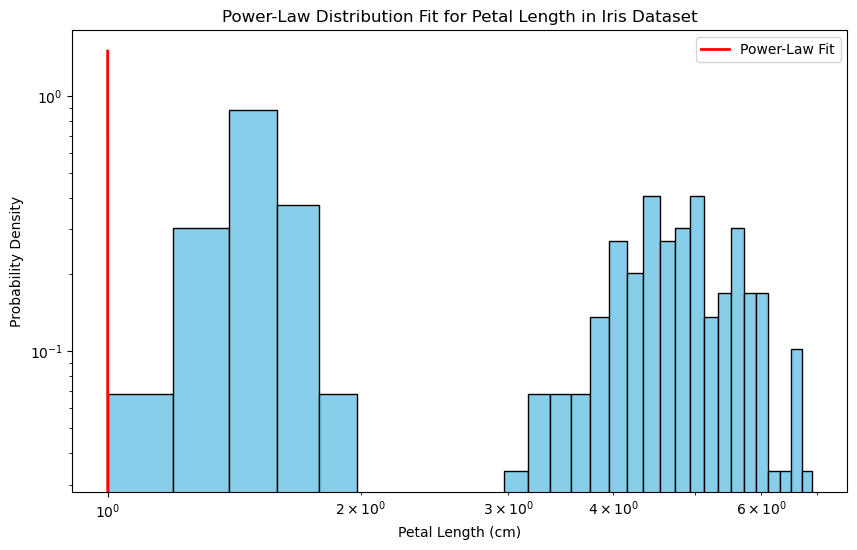

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw

# Load the Iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)

# Choose a feature to analyze (e.g., petal length)
feature = data['petal length (cm)']

# Remove zero values (if any) to avoid log issues
feature = feature[feature > 0]

# Plot histogram on a log-log scale to visualize if it follows a power-law
plt.figure(figsize=(10, 6))
counts, bins, _ = plt.hist(feature, bins=30, color='skyblue', edgecolor='black', density=True)

# Log-log plot
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Probability Density')
plt.title('Power-Law Distribution Fit for Petal Length in Iris Dataset')

# Fit a power-law to data and plot for comparison
# Here we're just plotting a power law function as a reference for visualization
x = np.linspace(min(feature), max(feature), 100)
y = powerlaw.pdf(x, 1.5)  # Adjust the shape parameter (e.g., 1.5) as needed
plt.plot(x, y, color='red', linewidth=2, label='Power-Law Fit')

plt.legend()
plt.show()
